In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
import torch
import pandas as pd
from tqdm.notebook import tqdm

In [ ]:
  !pip install transformers


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 33.8 MB/s 
     |████████████████████████████████| 182 kB 98.2 MB/s 
     |████████████████████████████████| 7.6 MB 68.9 MB/s 


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/Suicide_Detection.csv')
data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [ ]:
data = data[['text','class']]

In [ ]:
data = data.dropna()

In [ ]:
data.rename(columns = {'class':'cls'}, inplace = True)
data = data.loc[(data['cls'] == 'suicide') | (data['cls'] == 'non-suicide')]

In [ ]:
possible_labels = data.cls.unique()
possible_labels = ['non-suicide','suicide']

In [ ]:
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index

In [ ]:
label_dict = {'suicide': 0, 'non-suicide': 1}

In [ ]:
data['label'] = data.cls.replace(label_dict)

In [ ]:
data.head()

,text,cls,label
0,Ex Wife Threatening SuicideRecently I left my ...,suicide,0
1,Am I weird I don't get affected by compliments...,non-suicide,1
2,Finally 2020 is almost over... So I can never ...,non-suicide,1
3,i need helpjust help me im crying so hard,suicide,0
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide,0


## Getting predictions by creating Data-Loaders as this is the quickest way possible

In [ ]:
from transformers import BertTokenizer
from torch.utils.data import TensorDataset

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
encoded_data_val = tokenizer.batch_encode_plus(
    data.text.values, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2310: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(data.label.values)

In [ ]:
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size = 32

dataloader = DataLoader(dataset_val, 
                        sampler=SequentialSampler(dataset_val), 
                        batch_size=batch_size)

## Setting up hugging face models

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [ ]:
# sbcBI/sentiment_analysis_model //2

In [ ]:
from transformers.models.data2vec import modeling_tf_data2vec_vision
tokenizer = AutoTokenizer.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment-latest')
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment-latest')

tokenizer2 = AutoTokenizer.from_pretrained('finiteautomata/bertweet-base-sentiment-analysis')
model2 = AutoModelForSequenceClassification.from_pretrained('finiteautomata/bertweet-base-sentiment-analysis')

tokenizer3 = AutoTokenizer.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')
model3 = AutoModelForSequenceClassification.from_pretrained('distilbert-base-uncased-finetuned-sst-2-english')


Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/890 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/843k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


Downloading:   0%|          | 0.00/540M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
model2.to(device)
model3.to(device)


print(device)

cuda


## Writing Separate evaluation functions for getting labels for each model

In [ ]:
def evaluate(dataloader_val):

    model.eval()
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return predictions, true_vals

In [ ]:
def evaluate2(dataloader_val):

    model2.eval()
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model2(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return predictions, true_vals

In [ ]:
def evaluate3(dataloader_val):

    model3.eval()
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model3(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return predictions, true_vals

In [ ]:
model = model.to(device)
model2 = model2.to(device)
model3 = model3.to(device)

In [ ]:
predictions, true_vals= evaluate(dataloader)

In [ ]:
predictions2, true_vals2= evaluate2(dataloader)

In [ ]:
predictions3, true_vals3= evaluate3(dataloader)

In [ ]:
# To check if the order of the remained the same or not
np.array_equal(true_vals,data.label)

True

In [ ]:
preds = np.argmax(predictions, axis=1).flatten()
preds2 = np.argmax(predictions2, axis=1).flatten()
preds3 = np.argmax(predictions3, axis=1).flatten()



In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/all_labels_data.csv')

In [ ]:
data = data.drop('sentiment2', axis = 'columns')

In [ ]:
data['Sentiment2'] = data.sentiment3

In [ ]:
data['sentiment1'] = preds.tolist()
data['sentiment3'] = preds3.tolist()
data['Sentiment2'] = preds2.tolist()



In [ ]:
data.head()

,Unnamed: 0,text,cls,label,sentiment1,sentiment3,Sentiment2
0,0,Ex Wife Threatening SuicideRecently I left my ...,suicide,1,1,0,0
1,1,Am I weird I don't get affected by compliments...,non-suicide,0,1,1,1
2,2,Finally 2020 is almost over... So I can never ...,non-suicide,0,1,0,0
3,3,i need helpjust help me im crying so hard,suicide,1,1,0,0
4,4,"Iâm so lostHello, my name is Adam (16) and I...",suicide,1,1,0,0


In [ ]:
data.to_csv('/content/drive/MyDrive/Data/all_labels_data.csv')

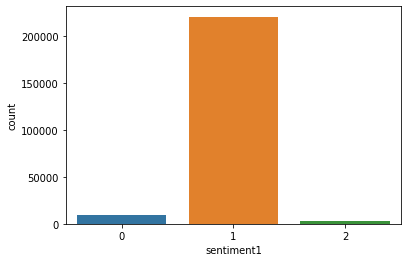

In [ ]:
sns.countplot(x='sentiment1',data=data)

First model was not responding well to this approach as can be seen from the plot above that most of the posts are predicted as Positive (only by the first model) which is outrightly wrong.

Therfore, for this particular model, hugging face pipeline API was used to get the predictions. This task takes a lot of time even with vectorized operations. Hemce it was decided to break the dataset in 9 parts, take prediction and join back as the whole dataset was taking more than 5 hours for the predictions.

In [ ]:
from transformers import pipeline
model_path = 'cardiffnlp/twitter-roberta-base-sentiment-latest'

sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path, max_length=512, truncation=True )

Downloading:   0%|          | 0.00/929 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Creating functions for vectoeized operations

In [ ]:
def get_sent(x):
  # sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
  try:
    return sentiment_task(x)[0]['label']
  except:
    return 'Ignore'
def curtail(x):
  l1 = len(x)
  if l1> 300:
    return x[0:300]
  else:
    return x


In [ ]:
# splitting our data into multiple dataframes
df1 = data.iloc[:20000]
df2 = data.iloc[20000:60000]
df3 = data.iloc[60000:90000]
df4 = data.iloc[90000:120000]
df5 = data.iloc[120000:160000]
df6 = data.iloc[160000:180000]
df7 = data.iloc[180000:200000]
df8 = data.iloc[200000:230000]
df9 = data.iloc[230000:]

In [ ]:
df1['text']=df1['text'].apply(curtail)
df1['Sentiment'] = df1['text'].apply(get_sent)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df1.to_csv('/content/drive/MyDrive/Data/df1.csv')

In [ ]:
df2['text']=df2['text'].apply(curtail)
df2['Sentiment'] = df2['text'].apply(get_sent)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df2.to_csv('/content/drive/MyDrive/Data/df2.csv')

In [ ]:
df3['text']=df3['text'].apply(curtail)
df3['Sentiment'] = df3['text'].apply(get_sent)
df3.to_csv('/content/drive/MyDrive/Data/df3.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df4['text']=df4['text'].apply(curtail)
df4['Sentiment'] = df4['text'].apply(get_sent)
df4.to_csv('/content/drive/MyDrive/Data/df4.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df5['text']=df5['text'].apply(curtail)
df5['Sentiment'] = df5['text'].apply(get_sent)
df5.to_csv('/content/drive/MyDrive/Data/df5.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df6['text']=df6['text'].apply(curtail)
df6['Sentiment'] = df6['text'].apply(get_sent)
df6.to_csv('/content/drive/MyDrive/Data/df6.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df7['text']=df7['text'].apply(curtail)
df7['Sentiment'] = df7['text'].apply(get_sent)
df7.to_csv('/content/drive/MyDrive/Data/df7.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df8['text']=df8['text'].apply(curtail)
df8['Sentiment'] = df8['text'].apply(get_sent)
df8.to_csv('/content/drive/MyDrive/Data/df8.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df9['text']=df9['text'].apply(curtail)
df9['Sentiment'] = df9['text'].apply(get_sent)
df9.to_csv('/content/drive/MyDrive/Data/df9.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Merging data

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Data/df1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Data/df2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Data/df3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Data/df4.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Data/df5.csv')
df6 = pd.read_csv('/content/drive/MyDrive/Data/df6.csv')
df7 = pd.read_csv('/content/drive/MyDrive/Data/df7.csv')
df8 = pd.read_csv('/content/drive/MyDrive/Data/df8.csv')
df9 = pd.read_csv('/content/drive/MyDrive/Data/df9.csv')

In [ ]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9]

data = pd.concat(frames, ignore_index=True)

In [ ]:
data = data[['text','label','Sentiment','sentiment2','sentiment3']]

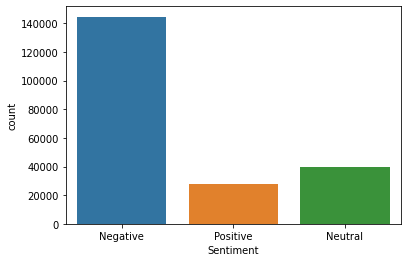

In [ ]:
sns.countplot(x='Sentiment',data=data)

In [ ]:
possible_labels = data.Sentiment.unique()
possible_labels

array(['Negative', 'Positive', 'Neutral', nan], dtype=object)

Removing all rows having label oher than Negative, Positive or Neutral

In [ ]:
data = data.loc[(data['Sentiment'] == 'Negative') | (data['Sentiment'] == 'Positive') | (data['Sentiment'] == 'Neutral')]

In [ ]:
possible_labels = data.Sentiment.unique()
possible_labels

array(['Negative', 'Positive', 'Neutral'], dtype=object)

In [ ]:
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'Negative': 0, 'Positive': 1, 'Neutral': 2}

In [ ]:
data['Sentiment'] = data.Sentiment.replace(label_dict)


In [ ]:
# Removing Special characters from text
data['text'] = data['text'].str.replace(r"[^a-zA-Z ]+", " ").str.strip()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.head()

,text,label,Sentiment2,Sentiment3,Sentiment
0,Ex Wife Threatening SuicideRecently I left my ...,1,0,0,0
1,Am I weird I don t get affected by compliments...,0,1,1,1
2,Finally is almost over So I can never hear ...,0,0,0,0
3,i need helpjust help me im crying so hard,1,0,0,0
4,I m so lostHello my name is Adam and I ve b...,1,0,0,0


## Taking mode to choose the value in majority

In [ ]:
data['Sentiment_label'] = data[['Sentiment2','Sentiment2','Sentiment']].mode(axis =1)

In [ ]:
dataset = data[['text']]
dataset['Post'] = data[['text']]
dataset.drop('text',axis='columns')
dataset['Suicidal_label'] = data['label']
dataset['Sentiment_label'] = data['Sentiment_label']

In [ ]:
dataset.head()

,Post,Suicidal_label,Sentiment_label
0,Ex Wife Threatening SuicideRecently I left my ...,0,0
1,Am I weird I don t get affected by compliments...,1,1
2,Finally is almost over So I can never hear ...,1,0
3,i need helpjust help me im crying so hard,0,0
4,I m so lostHello my name is Adam and I ve b...,0,0


In [ ]:
dataset.to_csv('/content/drive/MyDrive/Data/Final_dataset.csv')

## Test Dataset

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Data/test_labelled.csv', encoding= 'unicode_escape')
test


,Unnamed: 0,text,class,label1
0,0,I've pushed everyone awayI moved away from my ...,suicide,Negative
1,1,Gonna go cook some ramen boys And I don't mean...,non-suicide,Neutral
2,2,smilemy father today smiled at me but it looke...,suicide,Negative
3,3,"I keep being told to ""be careful"" by people th...",suicide,Negative
4,4,Yoo anyone down to give me some advice or just...,non-suicide,Negative
...,...,...,...,...
6367,6367,If you don't like rock then your not going to ...,non-suicide,Negative
6368,6368,You how you can tell i have so many friends an...,non-suicide,Positive
6369,6369,pee probably tastes like salty teaÃ¯Â£Â¿ÃÂ¼Ã...,non-suicide,Negative
6370,6370,The usual stuff you find hereI'm not posting t...,suicide,Negative


In [ ]:
# Removing rows where label is not one of these
test = test.loc[(test['class'] == 'suicide') | (test['class'] == 'non-suicide')]
test

,Unnamed: 0,text,class,label1
0,0,I've pushed everyone awayI moved away from my ...,suicide,Negative
1,1,Gonna go cook some ramen boys And I don't mean...,non-suicide,Neutral
2,2,smilemy father today smiled at me but it looke...,suicide,Negative
3,3,"I keep being told to ""be careful"" by people th...",suicide,Negative
4,4,Yoo anyone down to give me some advice or just...,non-suicide,Negative
...,...,...,...,...
6367,6367,If you don't like rock then your not going to ...,non-suicide,Negative
6368,6368,You how you can tell i have so many friends an...,non-suicide,Positive
6369,6369,pee probably tastes like salty teaÃ¯Â£Â¿ÃÂ¼Ã...,non-suicide,Negative
6370,6370,The usual stuff you find hereI'm not posting t...,suicide,Negative


In [ ]:
test = test.loc[(test['label1'] == 'Negative') | (test['label1'] == 'Positive')| (test['label1'] == 'Neutral')]
test = test.loc[(test['class'] == 'suicide') | (test['class'] == 'non-suicide')]
test

,Unnamed: 0,text,class,label1
0,0,I've pushed everyone awayI moved away from my ...,suicide,Negative
1,1,Gonna go cook some ramen boys And I don't mean...,non-suicide,Neutral
2,2,smilemy father today smiled at me but it looke...,suicide,Negative
3,3,"I keep being told to ""be careful"" by people th...",suicide,Negative
4,4,Yoo anyone down to give me some advice or just...,non-suicide,Negative
...,...,...,...,...
6367,6367,If you don't like rock then your not going to ...,non-suicide,Negative
6368,6368,You how you can tell i have so many friends an...,non-suicide,Positive
6369,6369,pee probably tastes like salty teaÃ¯Â£Â¿ÃÂ¼Ã...,non-suicide,Negative
6370,6370,The usual stuff you find hereI'm not posting t...,suicide,Negative


In [ ]:
test.rename(columns = {'class':'Suicidal','label1':'Sentiment'}, inplace = True)

In [ ]:
possible_labels1 = test.Suicidal.unique()
possible_labels2 = test.Sentiment.unique()

In [ ]:
label_dict1 = {'non-suicide': 0, 'suicide': 1}

In [ ]:
label_dict2 = {'Negative': 0, 'Positive': 1, 'Neutral': 2}
label_dict2

{'Negative': 0, 'Positive': 1, 'Neutral': 2}

In [ ]:
test['label1'] = test.Suicidal.replace(label_dict1)
test['label2'] = test.Sentiment.replace(label_dict2)

In [ ]:
# Removing Special characters from text
test['Post'] = test['text'].str.replace(r"[^a-zA-Z ]+", " ").str.strip()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
testset = test[['Post']]
testset['Suicidal_label'] = test['label1']
testset['Sentiment_label'] = test['label2']
testset

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Post,Suicidal_label,Sentiment_label
0,I ve pushed everyone awayI moved away from my ...,1,0
1,Gonna go cook some ramen boys And I don t mean...,0,2
2,smilemy father today smiled at me but it looke...,1,0
3,I keep being told to be careful by people th...,1,0
4,Yoo anyone down to give me some advice or just...,0,0
...,...,...,...
6367,If you don t like rock then your not going to ...,0,0
6368,You how you can tell i have so many friends an...,0,1
6369,pee probably tastes like salty tea can someon...,0,0
6370,The usual stuff you find hereI m not posting t...,1,0


In [ ]:
testset.to_csv('/content/drive/MyDrive/Data/testset.csv')